# PHYS 20323/60323 Homework Week 8 (part 2)

FALL 2022


### 4) Altitude of a satellite (continued)

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def satellite_height(hours):
    T = hours*60*60
    G = 6.67e-11
    M = 5.97e24
    R = 6371000
    h = ((G*M*T**2)/(4*np.pi**2))**(1/3) - R
    #print('The satellite will orbit at a height of '+str(round(h,2)) +' meters or '+str(round(h/1000,2))+' km.')
    return h

#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive hieghts with times less than geosynchronous in blue and those longer in green.

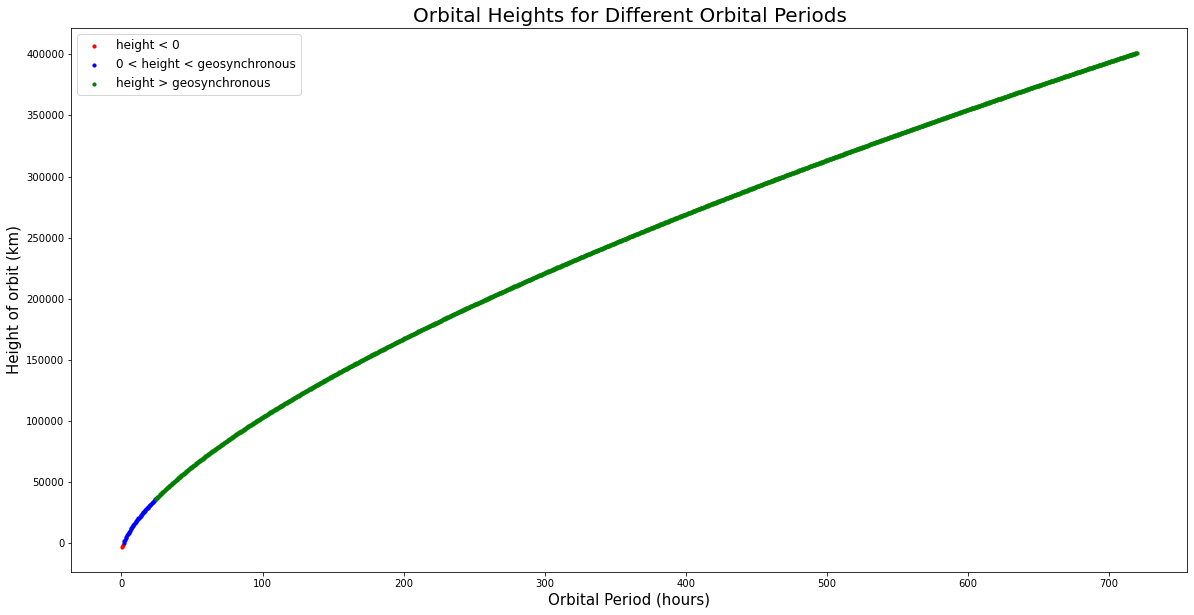

In [5]:
plt.rcParams['figure.figsize']=[20,10]
neg_heights = []
lgeo_heights = []
mgeo_heights = []
neg_time = []
lgeo_time = []
mgeo_time = []
time = np.arange(.5,720,.5)
for i in time:
    height = satellite_height(i)
    if height < 0:
        neg_heights.append(height/1000)
        neg_time.append(i)
    elif height < 36000000:
        lgeo_heights.append(height/1000)
        lgeo_time.append(i)
    else:
        mgeo_heights.append(height/1000)
        mgeo_time.append(i)


plt.scatter(neg_time,neg_heights,c='red',s=10)
plt.scatter(lgeo_time,lgeo_heights,c='blue',s=10)
plt.scatter(mgeo_time,mgeo_heights,c='green',s=10)
plt.title('Orbital Heights for Different Orbital Periods',size=20)
plt.xlabel('Orbital Period (hours)',size=15)
plt.ylabel('Height of orbit (km)',size=15)
legend = ['height < 0','0 < height < geosynchronous','height > geosynchronous']
plt.legend(legend,fontsize = 'large')

### 2) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.



In [6]:
def quad_eq(a,b,c):
    x1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    if x1 < x2:
        return x1
    else:
        return x2

def orbital_parameters():
    l1 = float(input('Enter the perihelion in meters: '))
    v1 = float(input('Enter the velocity at perihelion in m/s: '))
    G = 6.67e-11
    M = 1.9891e30
    b = (-2*G*M)/(v1*l1)
    c = -(v1**2 - 2*G*M/l1)
    v2 = quad_eq(1,b,c)
    l2 = (l1*v1)/v2
    a = .5*(l1 + l2)
    b = np.sqrt(l1*l2)
    T = 2*np.pi*a*b/(l1*v1)
    e = (l2-l1)/(l2+l1)
    Ty = T/(60*60*24*365)
    print('l2 = '+str(l2)+' meters')
    print('v2 = '+str(v2)+' m/s')
    print('a = '+str(a)+' meters')
    print('b = '+str(b)+' meters')
    print('T = '+str(Ty)+' years')
    print('e = '+str(e))
    

#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [7]:
orbital_parameters()

Enter the perihelion in meters: 1.471e11
Enter the velocity at perihelion in m/s: 3.0287e4
l2 = 152203426488.95538 meters
v2 = 29271.467816286593 m/s
a = 149651713244.4777 meters
b = 149629957015.71707 meters
T = 1.0013930557484005 years
e = 0.017051012575506567


In [8]:
orbital_parameters()

Enter the perihelion in meters: 8.783e10
Enter the velocity at perihelion in m/s: 5.4529e4
l2 = 5472738862158.555 meters
v2 = 875.1161330052964 m/s
a = 2780284431079.2773 meters
b = 693304157108.1093 meters
T = 80.18919937477547 years
e = 0.9684097069284723
